# 🎯 Aula 6 - Gráficos Análises Temporais 🎯

# Caso real:

A empresa Na+Tê, provedora de serviços de chá por assinatura, está buscando entender os cancelamentos das assinaturas (_churn_) ao longo do ano passado. Eles têm dados sobre a quantidade de clientes que cancelaram suas assinaturas e a quantidade de dias desde a inscrição em que o cancelamento ocorreu. 

<center><img src="./img/churn_example.png" alt="histograma de churn" width="350rm"></center>

A empresa solicitou a você, analista de dados, para observar fornecer insights sobre os padrões de cancelamento ao longo do tempo e possíveis estratégias para reduzir o churn. O objetivo é melhorar a retenção de clientes e a satisfação geral.

Qual o possível nível de dados que você está vendo? Quais os possíveis campos envolvidos?

Agora que já entendemos melhor os tipo de dados que estamos vendo, qual o possível insight que podemos levantar para a empresa?

---
Analisar variáveis ao longo do tempo é crucial em muitas áreas, desde finanças até ciências ambientais. Gráficos temporais ajudam a visualizar tendências, padrões e sazonalidades em séries temporais, fornecendo insights valiosos para previsões e tomada de decisões.

# Lineplot

<center><img src="https://emanuelaf.github.io/pred-sales_files/figure-html/unnamed-chunk-6-1.png" width="450" alt="sales mensais durante o ano"></center><br>

Um lineplot é um gráfico que usa linhas para conectar pontos de dados individuais, mostrando tendências ao longo do tempo. É ideal para visualizar dados contínuos ou temporais (dados ao longo de um eixo temporal são chamados de **séries temporais**).


## Para que Serve
- Visualizar tendências e mudanças ao longo do tempo.
- Comparar várias séries temporais simultaneamente.

## Aplicações
- Monitoramento de mudanças no mercado de ações ao longo do tempo.
- Análise de padrões de temperatura ao longo dos anos.

## Como Fazer no Seaborn

O lineplot do Seaborn é uma ferramenta eficaz para criar gráficos de linha. Oferece flexibilidade para mostrar várias linhas e estilizar o gráfico.

Vamos trabalhar com outro dataset famosissimo, chamado **Air Passengers** ou **Flights**, que mostra a quantidade de passageiros na década de 50.

In [1]:
import seaborn as sns
import pandas as pd

# load flights dataset
df = sns.load_dataset('flights')

# join year and month and convert to time
df['date'] = pd.to_datetime(df['year'].astype(str)+'-'+df['month'].astype(str))

#get only timeseries
df_passengers = df[['date','passengers']]

<Axes: xlabel='date', ylabel='passengers'>

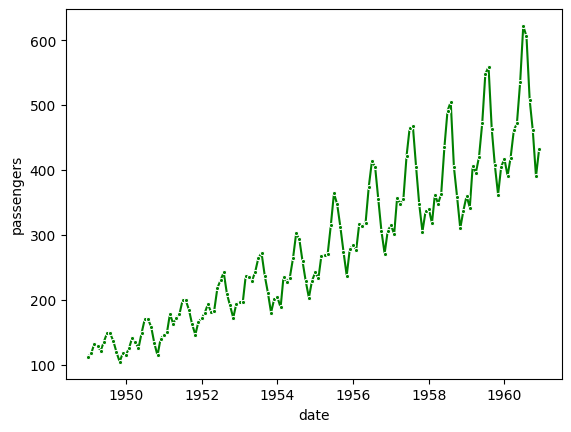

In [2]:
# Criando um lineplot
sns.lineplot(x='date', y='passengers', data=df_passengers, marker='o', color='green', markersize=3)

**Explicação dos Parâmetros**
>`x` e `y` definem as variáveis dos eixos.<br> 
`data` especifica o DataFrame com os dados.<br>
`marker` define o estilo dos marcadores.<br>
`color` define a cor da linha.

# Análise de Sazonalidade

A análise de sazonalidade identifica padrões recorrentes em séries temporais em intervalos regulares, como diariamente, mensalmente ou anualmente.

Estes métodos fornecem maneiras eficientes de analisar dados temporais, destacando tendências e padrões sazonais. O Seaborn e o Statsmodels são ferramentas valiosas para visualizar e decompor séries temporais.

## Para que Serve
- Detectar padrões de comportamento em intervalos de tempo regulares.
- Informar decisões de negócios baseadas em tendências sazonais.



## Aplicações
- Análise de vendas de produtos sazonais.
- Estudo de padrões de tráfego ou uso de energia.


## Como Fazer com Statsmodels
A função seasonal_decompose do pacote statsmodels.tsa.seasonal pode decompor uma série temporal em componentes de tendência, sazonalidade e ruído.

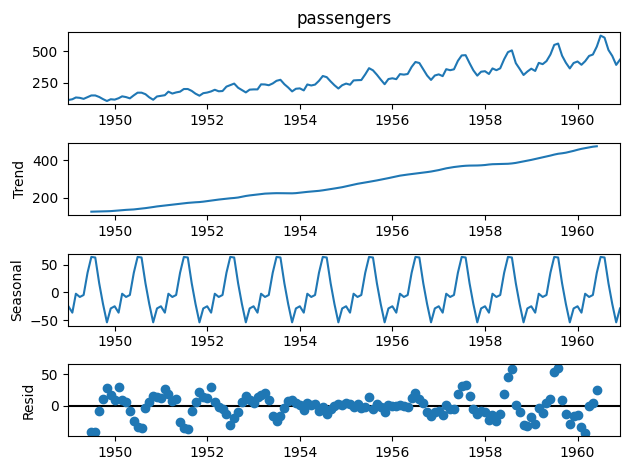

In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Dados de exemplo
serie_temporal = df_passengers.set_index('date')['passengers']

# Decomposição sazonal
resultados = seasonal_decompose(serie_temporal, model='a', period=12)

# Plotando os componentes
resultados.plot()
plt.show()

**Explicação dos Parâmetros**

> `model` define o tipo de modelo, aditivo ou multiplicativo. <br>
`period` especifica o período de sazonalidade (7 para uma semana, 12 para o ano, )

Se quiser saber mais sobre os modelos aditivo e multiplicativo da teorica de decomposição das séries temporais, [documentação aqui](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html#statsmodels.tsa.seasonal.seasonal_decompose:~:text=decomposition%20using%20LOESS.-,Notes,-This%20is%20a)



# Referências

[Documentação Pandas](https://pandas.pydata.org/docs/)

[Documentação do Seaborn](https://seaborn.pydata.org/)

[Documentação do Statsmodels](https://www.statsmodels.org/stable/api.html)

# Hands-on

Carregue os dados de `taxis` e realize análise temporal de passageiras e receita total:

In [4]:
import seaborn as sns
import pandas as pd

# load dataset
df = sns.load_dataset('taxis')

# i want to have all group by date
df_taxis = df.sort_values('pickup').groupby(pd.Grouper( freq='D', key='pickup')).agg({c:'sum' if c!='fare' else 'mean' for c in df.select_dtypes(include='number').columns}).assign(weekday = lambda x: x.index.weekday)

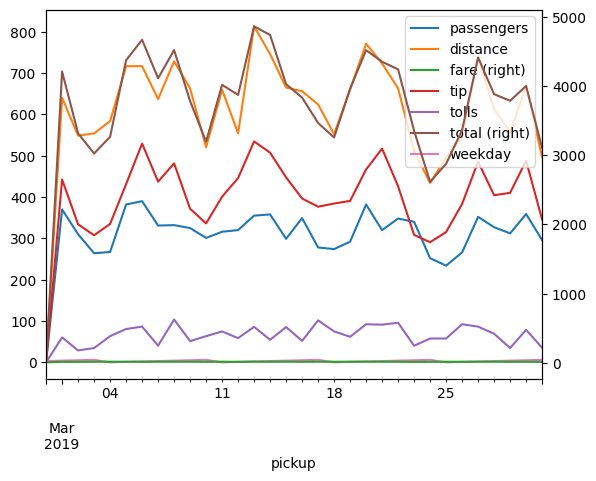

In [6]:
# plot values to see the results
df_taxis.plot(secondary_y=['total','fare']);

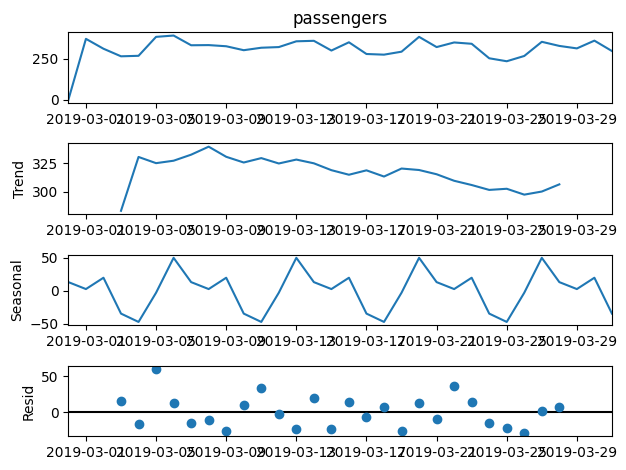

In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Dados de exemplo
serie_temporal = df_taxis

# Decomposição sazonal
resultados = seasonal_decompose(x=serie_temporal['passengers'], model='a', period=7)

# Plotando os componentes
resultados.plot()
plt.show()